# Self-Driving Car Engineer Nanodegree


## Project: **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

In addition to implementing code, there is a brief writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) that can be used to guide the writing process. Completing both the code in the Ipython notebook and the writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/322/view) for this project.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note: If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".**

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="examples/line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="examples/laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

**Run the cell below to import some packages.  If you get an `import error` for a package you've already installed, try changing your kernel (select the Kernel menu above --> Change Kernel).  Still have problems?  Try relaunching Jupyter Notebook from the terminal prompt.  Also, consult the forums for more troubleshooting tips.**  

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


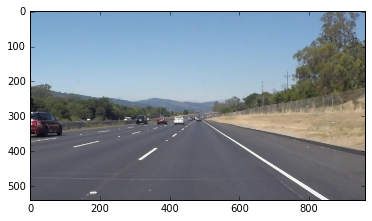

In [2]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Ideas for Lane Detection Pipeline

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

## Helper Functions

Below are some helper functions to help get you started. They should look familiar from the lesson!

## Test Images

Build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [3]:
import os
print( "Using Images", os.listdir("test_images/"))

#Import Images to use
images = [mpimg.imread('test_images/solidYellowLeft.jpg'), mpimg.imread('test_images/solidWhiteRight.jpg'),
          mpimg.imread('test_images/solidWhiteCurve.jpg'), mpimg.imread('test_images/solidYellowCurve.jpg'),
          mpimg.imread('test_images/solidYellowCurve2.jpg'), mpimg.imread('test_images/whiteCarLaneSwitch.jpg')]


Using Images ['solidWhiteRight.jpg', 'solidWhiteCurve.jpg', 'whiteCarLaneSwitch.jpg', 'solidYellowCurve2.jpg', 'solidYellowLeft.jpg', 'solidYellowCurve.jpg']


## Testing

My first step to building the pipeline, is to explore the results of applying the different methods to the images. This will give me a good basis to determine what should be implemented for the pipeline

### Color


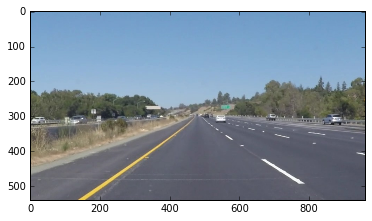

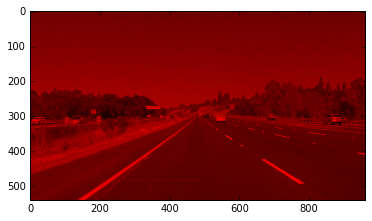

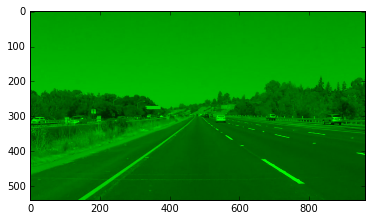

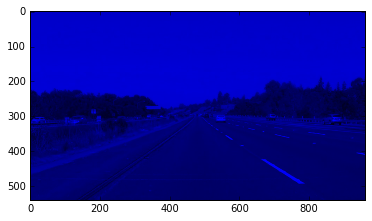

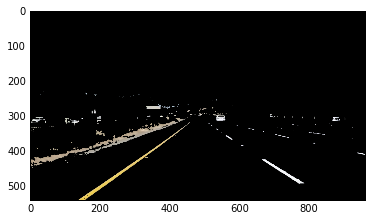

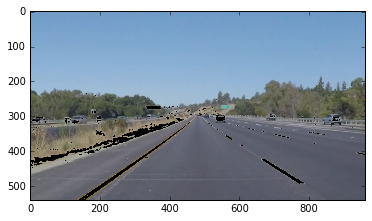

In [4]:
#trying colors
image=images[0]
plt.imshow(image)
plt.show()

#Show what the picture looks like with just each color channel
b = image.copy()
# set green and red channels to 0
b[:, :, 0] = 0
b[:, :, 1] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 1] = 0
r[:, :, 2] = 0


# RGB - Red
plt.imshow(r)
plt.show()
# RGB - Green
plt.imshow(g)
plt.show()
# RGB - Blue
plt.imshow(b)
plt.show()

#Using the pictures above adjust the color thresholds to try to get only the lines
color_adjust = np.copy(image)
red_threshold = 170
green_threshold = 150
blue_threshold = 70

thresholds = (image[:,:,0] < red_threshold )| (image[:,:,1] < green_threshold) | (image[:,:,2] < blue_threshold)
thresholds2 = (image[:,:,0] > red_threshold ) & (image[:,:,1] > green_threshold) & (image[:,:,2] > blue_threshold)
color_adjust[thresholds] = 0;
Opp_color_adjust = np.copy(image)
Opp_color_adjust[thresholds2]=0;

plt.imshow(color_adjust)
plt.show()
plt.imshow(Opp_color_adjust)
plt.show()



## Color Results
From the color you can do a pretty good job of extracting the lines from the images, however I don't think this will be sufficient as the only method and is not very robust to different environments

## Next Try Edge Detection

Original Canny Edges


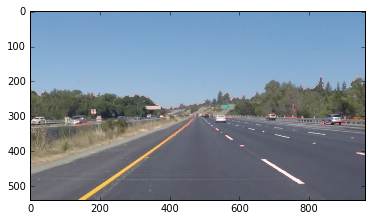

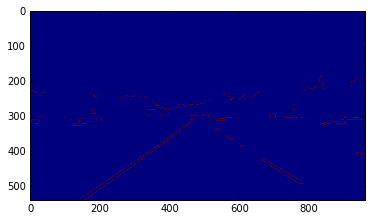

Color Mask


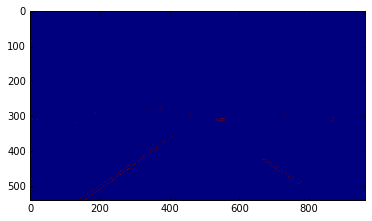

Region Mask


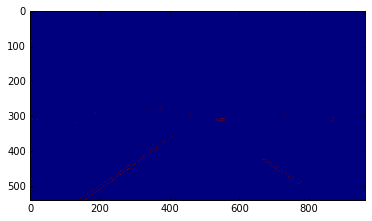

Dialate and erode


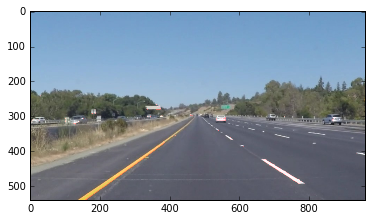

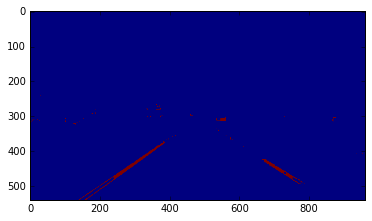

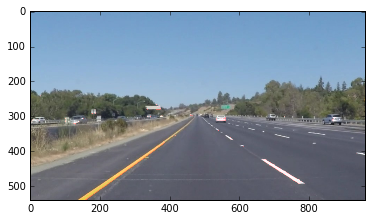

In [5]:
#Canny Edge Detection
#Function to plot edges over original image
def showEdges(edg):
    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edg, edg, edg)) 
    color_edges[:, :, 1] = 0
    color_edges[:, :, 2] = 0
    
    # Draw the lines on the edge image
    plt.imshow(cv2.addWeighted(color_edges, 0.8, image, 1, 0))
    plt.show()

ysize = image.shape[0]
xsize = image.shape[1]
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = YY < (ysize*.3)


#Set thresholds
low_threshold = 10
high_threshold =150

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
kernel_size = 11
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

print("Original Canny Edges")
showEdges(edges)
plt.imshow(edges)
plt.show()

#Try Masking with the Color threshold mask
print("Color Mask")
edges[thresholds] = 0
plt.imshow(edges)
plt.show()

#Mask Height above which we don't expect to draw lines
edges[region_thresholds]=0
print("Region Mask")
plt.imshow(edges)
plt.show()

print("Dialate and erode")
#Dialate and erode edges to get better results
kernel = np.ones((6,6), np.uint8)
edges = cv2.dilate(edges, kernel, iterations = 1)
edges = cv2.erode(edges,None,iterations=2)

showEdges(edges)
plt.imshow(edges)
plt.show()
#edges = cv2.dilate(edges, kernel, iterations = 1)
showEdges(edges)


## Edge Detection Results
The edge detection seems to do a good job of getting the lines, I incorporated the color thresholds to filter out additional items that are being recognized. We still need to figure out a way to get just the lines, as there are still some other detected parts of the image

## Try Hough Transform to detect the lines

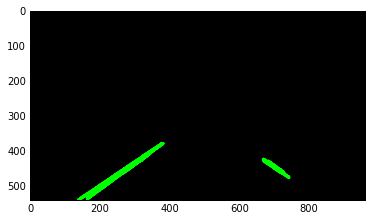

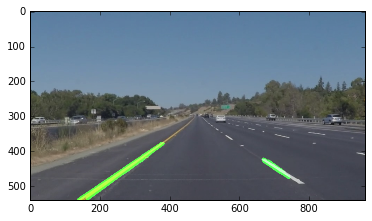

LINE:  0  =  [[163 536 379 379]]
 Len:  267.02996086581743
 Slope:  -0.726851851851852
LINE:  1  =  [[668 427 739 475]]
 Len:  85.70297544426332
 Slope:  0.6760563380281703
LINE:  2  =  [[139 539 377 379]]
 Len:  286.7821472825671
 Slope:  -0.6722689075630249
LINE:  3  =  [[667 424 728 467]]
 Len:  74.63243262818116
 Slope:  0.7049180327868843
LINE:  4  =  [[680 429 724 461]]
 Len:  54.405882034941776
 Slope:  0.7272727272727252
LINE:  5  =  [[240 477 339 405]]
 Len:  122.41323457861898
 Slope:  -0.7272727272727271
LINE:  6  =  [[668 428 718 462]]
 Len:  60.4648658313239
 Slope:  0.6799999999999999
LINE:  7  =  [[311 431 342 407]]
 Len:  39.20459156782532
 Slope:  -0.7741935483870925
LINE:  8  =  [[240 479 376 380]]
 Len:  168.21712160181556
 Slope:  -0.7279411764705882
LINE:  9  =  [[240 476 290 438]]
 Len:  62.80127387243033
 Slope:  -0.7599999999999982
LINE:  10  =  [[265 463 311 430]]
 Len:  56.61271941887264
 Slope:  -0.7173913043478233


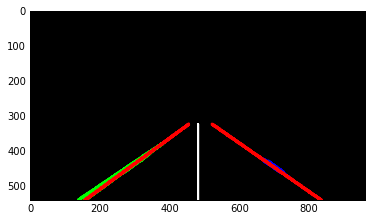

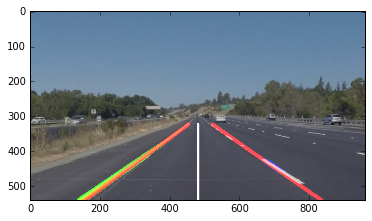

In [6]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15    # minimum number of votes (intersections in Hough grid cell)
min_line_length = 30 #minimum number of pixels making up a line
max_line_gap = 0    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        if(x1 != x2 and y1 != y2):
            cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),10)  

plt.imshow(line_image)
plt.show()

# Draw the lines on the edge image
line_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 
plt.imshow(line_edges)
plt.show()

line_image = np.copy(image)*0 # creating a blank to draw lines on
import math

# Iterate over the output "lines" and draw lines on a blank image
left_slope=[]
left_intercept=[]
right_slope=[]
right_intercept=[]

y_min=int(image.shape[0])
y_max=int(image.shape[0]*0.6)

def distance(x1,y1,x2,y2):
    return math.sqrt(((x2-x1)**2)+((y2-y1)**2))

# Iterate over the output "lines" and draw lines on a blank image
i=0
for line in lines:
    print("LINE: ",i," = ",line) 
    i+=1
    for x1,y1,x2,y2 in line:
        if(x1 != x2 and y1 != y2):
            m,b = np.polyfit([x1, x2], [y1, y2], 1)
            if (abs(m) > .1 and abs(m) < 1.5):
                print(" Len: ", distance(x1,y1,x2,y2))

                print(" Slope: ", m)
                if(((x2+x1)/2) < (image.shape[1]/2)):
                    m,b = np.polyfit([x1, x2], [y1, y2], 1)
                    left_slope.append(m)
                    left_intercept.append(b)
                    left_x1=int((y_min-np.median(left_intercept))/np.median(left_slope))
                    left_x2=int((y_max-np.median(left_intercept))/np.median(left_slope))
                    cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),10)

                elif(((x2+x1)/2) > (image.shape[1]/2)):
                    m,b = np.polyfit([x1, x2], [y1, y2], 1)
                    right_slope.append(m)
                    right_intercept.append(b)
                    right_x1=int((y_min-np.median(right_intercept))/np.median(right_slope))
                    right_x2=int((y_max-np.median(right_intercept))/np.median(right_slope))
                    cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),10)

cv2.line(line_image,(right_x1,y_min),(right_x2,y_max),(255,0,0),10)
cv2.line(line_image,(left_x1,y_min),(left_x2,y_max),(255,0,0),10)
cv2.line(line_image,(int(image.shape[1]/2),y_min),(int(image.shape[1]/2),y_max),(255,255,255),5)

plt.imshow(line_image)
plt.show()

# Draw the lines on the edge image
line_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 
plt.imshow(line_edges)
plt.show()

## Other Methods of Line Detection

I also tried to do countours below, but I think since we are trying to find lines it's best to use the Hough transform

833.5
1518.5


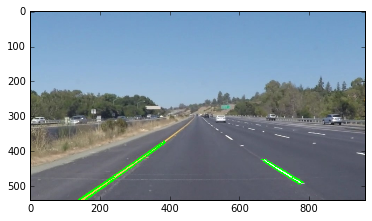

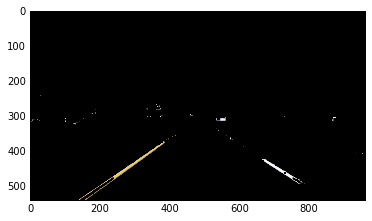

In [7]:
_, cnts, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

test3=np.copy(image)

for c in cnts:
    if cv2.contourArea(c) > 300:
        print(cv2.contourArea(c))
        cv2.drawContours(test3, c, -1, (0,255,0), 3)

plt.imshow(test3)
plt.show()

test4=np.copy(image)
test4[edges == 0] = 0;
plt.imshow(test4)
plt.show()


## Build a Lane Finding Pipeline


Build the pipeline and run your solution on all test_images. Make copies into the `test_images_output` directory, and you can use the images in your writeup report.

Try tuning the various parameters, especially the low and high Canny thresholds as well as the Hough lines parameters.

In [8]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.
def showEdges(edg,img):
    # Create a "color" binary image to combine with line image
    color_edges = np.dstack((edg, edg, edg)) 
    color_edges[:, :, 1] = 0
    color_edges[:, :, 2] = 0
    
    # Draw the lines on the edge image
    plt.imshow(cv2.addWeighted(color_edges, 0.8, img, 1, 0))
    plt.show()
    
def getColorThreshold(img):
    red_threshold = 170
    green_threshold = 150
    blue_threshold = 70

    colorThreshold = (img[:,:,0] < red_threshold )| (img[:,:,1] < green_threshold) | (img[:,:,2] < blue_threshold)
    return colorThreshold

def getRegionThreshold(img,MaxHeight = 0.4):
    ysize = img.shape[0]
    xsize = img.shape[1]
    XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
    regionThreshold = YY < (ysize*(1-MaxHeight))
    return regionThreshold

def getEdges(img,colorfilter=True,MaxHeight = 0.4):
    #Set thresholds
    low_threshold = 10
    high_threshold =150
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel_size = 11
    blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

    #Mask to only use a percentage of the lower part of the image
    HeightThreshold = getRegionThreshold(img,MaxHeight)
    edges[HeightThreshold] = 0
    
    #Apply the color filters on top of the edges
    if colorfilter:
        color_threshold = getColorThreshold(img)
        edges[color_threshold] = 0
    
    #Dialate and erode edges to get better results
    kernel = np.ones((6,6), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations = 1)
    edges = cv2.erode(edges,None,iterations=2)
    
    return(edges)

def getLines(edges):
    # Define the Hough transform parameters
    # Make a blank the same size as our image to draw on
    rho = 2 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 15    # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 40 #minimum number of pixels making up a line
    max_line_gap = 5    # maximum gap in pixels between connectable line segments

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
    return(lines)

def processLines(img, lines):
   
    left_slope=[]
    left_intercept=[]
    right_slope=[]
    right_intercept=[]
    
    # Iterate over the output "lines" and draw lines on a blank image
    for line in lines:
        for x1,y1,x2,y2 in line:
            #Make sure we don't have straight lines
            if(x1 != x2 and y1 != y2):
                m,b = np.polyfit([x1, x2], [y1, y2], 1)
                #only want slopes in a certain range
                if (abs(m) > .5 and abs(m) < .9):
                    #Clasiffy left based on being on the left half of the image
                    if(((x2+x1)/2) < (img.shape[1]/2)):
                        m,b = np.polyfit([x1, x2], [y1, y2], 1)
                        left_slope.append(m)
                        left_intercept.append(b)

                    elif(((x2+x1)/2) > (img.shape[1]/2)):
                        m,b = np.polyfit([x1, x2], [y1, y2], 1)
                        right_slope.append(m)
                        right_intercept.append(b)
                        
    return right_slope,right_intercept,left_slope,left_intercept

#given the slope and intercept of a left and right line draw them on the image
def drawLines(img,right_slope, right_intercept, left_slope, left_intercept, MaxHeight = 0.4):
    line_image = np.copy(img)*0 # creating a blank to draw lines on
    
    #get the min and max of the Y position
    y_min=int(img.shape[0])
    y_max=int(img.shape[0]*(1 - MaxHeight))
    
    #Calculate two points of each line given the slop, intercept and max and min y points
    right_x1=int((y_min-right_intercept)/right_slope)
    right_x2=int((y_max-right_intercept)/right_slope)
    
    left_x1=int((y_min-left_intercept)/left_slope)
    left_x2=int((y_max-left_intercept)/left_slope)
    
    #Draw the lines
    cv2.line(line_image,(right_x1,y_min),(right_x2,y_max),(255,0,0),10)
    cv2.line(line_image,(left_x1,y_min),(left_x2,y_max),(255,0,0),10)
    
    # Draw the lines on the edge image
    returnImage = np.copy(img)
    line_edges = cv2.addWeighted(returnImage, 1, line_image, .8, 0) 
    
    return (line_edges)


## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

**Note: if you get an import error when you run the next cell, try changing your kernel (select the Kernel menu above --> Change Kernel). Still have problems? Try relaunching Jupyter Notebook from the terminal prompt. Also, consult the forums for more troubleshooting tips.**

**If you get an error that looks like this:**
```
NeedDownloadError: Need ffmpeg exe. 
You can download it by calling: 
imageio.plugins.ffmpeg.download()
```
**Follow the instructions in the error message and check out [this forum post](https://discussions.udacity.com/t/project-error-of-test-on-videos/274082) for more troubleshooting tips across operating systems.**

In [9]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

0


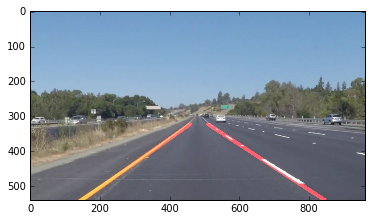

[0.6470588235294124]
[-0.6993006993007003]
1


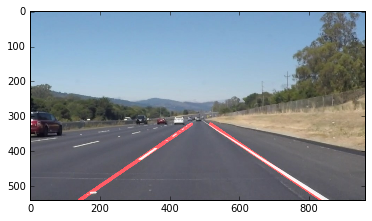

[0.6734693877550989]
[-0.6771602257924421]
2


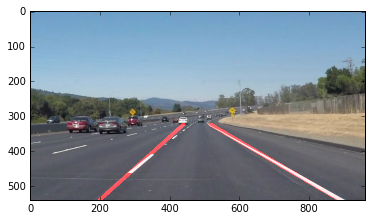

[0.581196581196581]
[-0.8958333333333341]
3


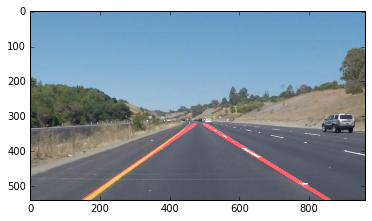

[0.6086956521739143]
[-0.6794871794871803]
4


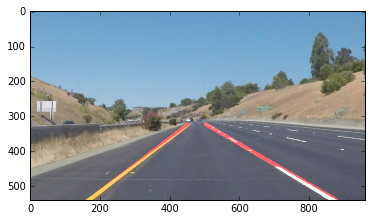

[0.5766871165644177]
[-0.761385199240987]
5


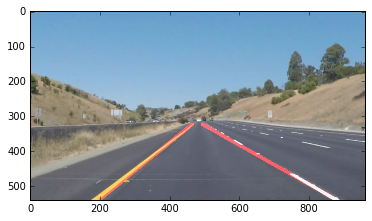

[0.5606617647058827]
[-0.8054001721170401]


In [10]:
left_m_list = []
left_b_list = []
right_m_list = []
right_b_list = []

def process_image(image):
    global left_m_list
    global left_b_list
    global right_m_list
    global right_b_list
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    edges = getEdges(image)
    lines = getLines(edges)
    
    if lines is not None:
        l_slope,l_intercept,r_slope,r_intercept = processLines(image,lines)

        if(len(l_slope)>=1):
            left_m_list.insert(0,np.median(l_slope))
        if(len(l_intercept)>=1):
            left_b_list.insert(0,np.median(l_intercept))
        if(len(r_slope)>=1):
            right_m_list.insert(0,np.median(r_slope))
        if(len(r_intercept)>=1):
            right_b_list.insert(0,np.median(r_intercept))

    return drawLines(image,np.mean(left_m_list[:5]),np.mean(left_b_list[:5]),np.mean(right_m_list[:5]),np.mean(right_b_list[:5]))

for i in range(len(images)):
    left_m_list = []
    left_b_list = []
    right_m_list = []
    right_b_list = []
    if (1):
        print(i)
        #plt.imshow(process_image(images[i],left_m_list, left_b_list, right_m_list, right_b_list))
        plt.imshow(process_image(images[i]))
        plt.show()
        print(left_m_list)
        print(right_m_list)
    

Let's try the one with the solid white lane on the right first ...

In [11]:
left_m_list = []
left_b_list = []
right_m_list = []
right_b_list = []

white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:07<00:00, 31.47it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 8.18 s, sys: 1.56 s, total: 9.74 s
Wall time: 7.5 s


Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [12]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Improve the draw_lines() function

**At this point, if you were successful with making the pipeline and tuning parameters, you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform. As mentioned previously, try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines. You can see an example of the result you're going for in the video "P1_example.mp4".**

**Go back and modify your draw_lines function accordingly and try re-running your pipeline. The new output should draw a single, solid line over the left lane line and a single, solid line over the right lane line. The lines should start from the bottom of the image and extend out to the top of the region of interest.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [13]:
left_m_list = []
left_b_list = []
right_m_list = []
right_b_list = []

yellow_output = 'test_videos_output/solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:13<00:00, 49.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 17.5 s, sys: 4.07 s, total: 21.6 s
Wall time: 14.2 s


In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Writeup and Submission

If you're satisfied with your video outputs, it's time to make the report writeup in a pdf or markdown file. Once you have this Ipython notebook ready along with the writeup, it's time to submit for review! Here is a [link](https://github.com/udacity/CarND-LaneLines-P1/blob/master/writeup_template.md) to the writeup template file.


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [15]:
left_m_list = []
left_b_list = []
right_m_list = []
right_b_list = []

challenge_output = 'test_videos_output/challenge.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip3 = VideoFileClip('test_videos/challenge.mp4').subclip(0,5)
clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/challenge.mp4
[MoviePy] Writing video test_videos_output/challenge.mp4


100%|██████████| 251/251 [00:08<00:00, 28.31it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/challenge.mp4 

CPU times: user 11 s, sys: 2.26 s, total: 13.3 s
Wall time: 9.46 s


In [16]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))